                                                                                      Assignment1 - Animesh Giri
                                                            INFO7390 - Advances in Data Science and Architecture
                                                        References -(1)KMeans basics by Prof. Ramkumar Hariharan
                                                              (2)Introduction to Machine Learning with Python by 
                                                                               Andreas C. Müller and Sarah Guido

# K-means Algorithm on Online Retail Dataset

## Importing modules, Data Import and Cleaning

In [81]:
#Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [82]:
#Creating a dataframe by importing our data
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [83]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [84]:
#Get the statistical description of the dataframe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [85]:
#checking number of rows and columns in the data frame
df.shape

(541909, 8)

In [86]:
#Getting the sum of all missing values w.r.t each column
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [87]:
#Removing all missing values
df1 = df.dropna(subset = ["CustomerID","Description"])
df1.shape

(406829, 8)

In [88]:
#Dropping all duplicates
df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


-----------------------------------------------

In order to make our data more relevant for applying any algorithm we will use only the relevant columns of our dataset.

In [89]:
#Taking relevant columns into consideration
df3 = df2 [['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
print(df3.shape)
df3.head(2)

(401604, 5)


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39


---------------------------------

To improvise the dataset, we use multiple methods below which would help us ahead.

In [90]:
#Create a total price column by multiplying quantity with unit price

df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']
print(df3.shape)
df3.head(2)

(401604, 6)


/var/folders/2n/9n7299y94rz8cb8w_15j91wm0000gn/T/ipykernel_95573/3105757741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [91]:
#Print out earliest and latest dates in the data

print('Min:{}; Max:{}'.format(df3["InvoiceDate"].min(), df3["InvoiceDate"].max()))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [92]:
#Create a reference point for the analysis

current_date = dt.datetime(2011,12,10)
current_date

datetime.datetime(2011, 12, 10, 0, 0)

In [93]:
#Calculate the aggregates- recency, frequency and, monetary. Recency tells you how many days since 
#last transaction for each customer, frequency tells you how frequently does a customer shop and,
#monetary tells you the total shopping spending for each customer

df4 = df3.groupby(['CustomerID']).agg({ 'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})
df4.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
print(df4.shape)
df4.head(3)

(4372, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24


In [94]:
#Remove rows with any zero values. This is to facilitate downstream pre-processing and avoid NaNs

df5 = df4[(df4 > 0).all(1)]
print(df5.shape)

(4284, 3)


## Data Pre-processing

The K-means clustering algorithm has a few key assumptions about the data: (1) data is not skewed, 
(2) features have the same mean and, (3) features have the same variance.

In [95]:
#Get the statistical description of the dataframe

df5.describe()

,Recency,Frequency,Monetary
count,4284.000000,4284.000000,4.284000e+03
mean,90.673436,90.187675,1.802891e+03
std,99.212825,217.749044,7.226246e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,2.988725e+02
50%,50.000000,42.000000,6.467200e+02
75%,140.000000,99.000000,1.596963e+03
max,373.000000,7812.000000,2.794890e+05


Now, we will check how much is the skewness of our data dimensions.

1.2576003204777726


/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


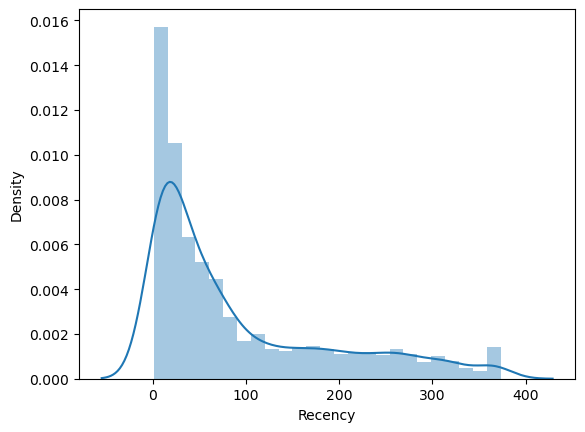

In [96]:
#Skewness of "Recency"

sns.distplot(df5['Recency'])
print(df5['Recency'].skew())

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


19.363322617491672

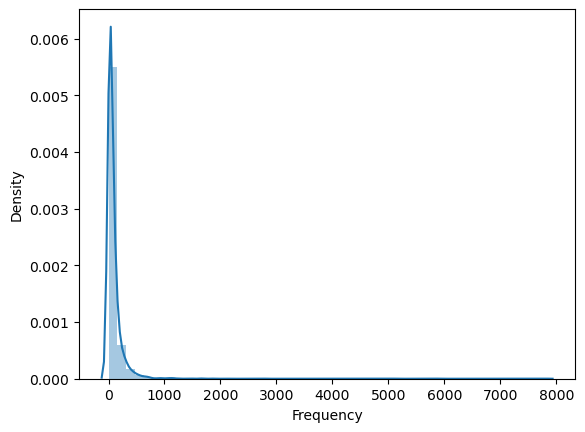

In [97]:
#Skewness of "Frequency"

sns.distplot(df5['Frequency'])
df5['Frequency'].skew()

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


22.25657073653886

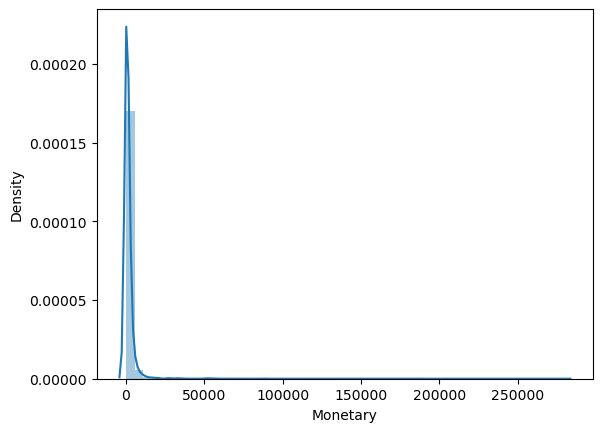

In [98]:
#Skewness of "Monetary"

sns.distplot(df5['Monetary'])
df5['Monetary'].skew()

As we can observe that except monetary the other two columns are skewed, we apply the log transform to remove the skewness. Also, we would add a constant to avoid negative values.

In [99]:
df6 = (np.log(df5 + 1))
print(df6.shape)
df6.head(3)

(4284, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245


Now we will plot the columns to check if the log transformation made any difference.

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.3769323277729383

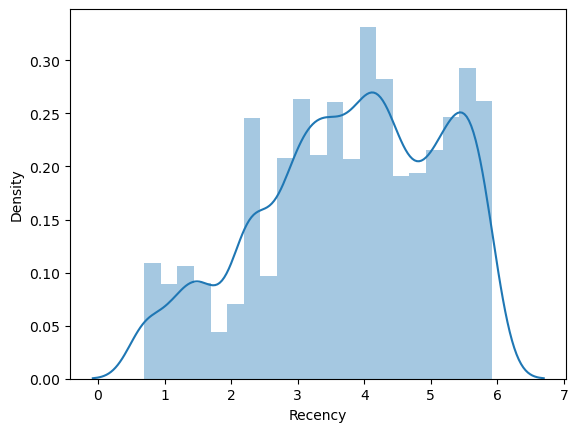

In [100]:
sns.distplot(df6['Recency'])
df6['Recency'].skew()

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.011669562754515393

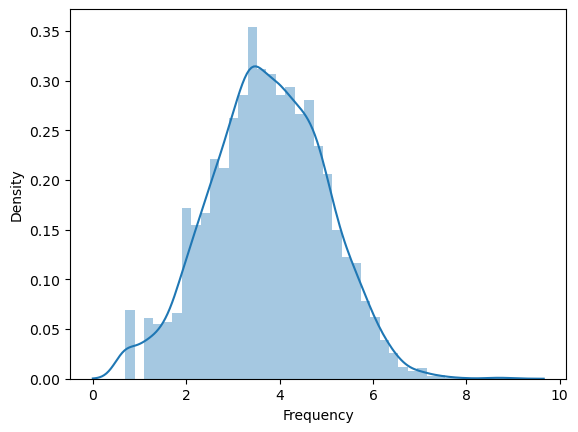

In [101]:
sns.distplot(df6['Frequency'])
df6['Frequency'].skew()

/Users/animeshgiri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.1954316670801844

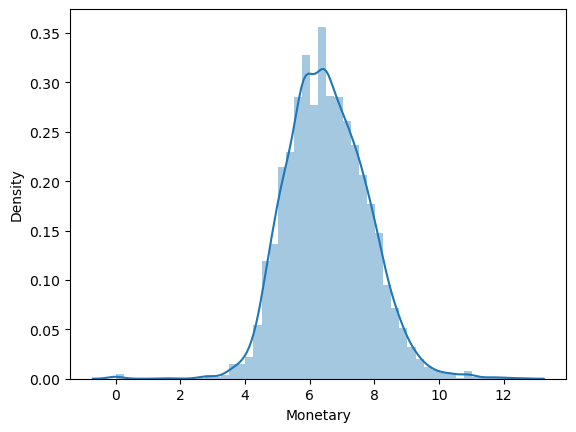

In [102]:
sns.distplot(df6['Monetary'])
df6['Monetary'].skew()

After verifying the skewness, we would normalize our data in order to make it use a common scale. This can be done by using the standard scaler method. The simplest way to implement this is to use the formula (x-mean)/std where x is the data value.

In [103]:
# Calculate the mean and standard deviation for each column
mean = df6.mean()
std = df6.std()

df7 = (df6 - mean) / std
df7.columns = df6.columns
df7.describe()

,Recency,Frequency,Monetary
count,4.284000e+03,4.284000e+03,4.284000e+03
mean,2.935716e-16,-1.285412e-16,-1.990316e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.256755e+00,-2.482901e+00,-5.244081e+00
25%,-6.529427e-01,-6.528720e-01,-6.740030e-01
50%,1.072420e-01,1.105624e-02,-5.692351e-02
75%,8.495291e-01,6.971021e-01,6.666674e-01
max,1.561569e+00,4.239934e+00,4.804752e+00


In [104]:
#Creating a numpy representation of our dataframe
X = df7.values

## K-Means Clustering

Now we write functions for k-means method and elbow method to get the optimal k value.

In [105]:
def k_means(X, K, max_iters=100):
    
    # Initialize centroids randomly
    rand_indices = np.random.choice(len(X), K)
    centroids = X[rand_indices]
    
    # Run the main k-means algorithm
    for i in range(max_iters):
        # Assign labels to each datapoint based on centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Compute new centroids based on the labels
        new_centroids = np.zeros((K, X.shape[1]))
        for j in range(K):
            new_centroids[j] = X[labels == j].mean(axis=0)
        
        # Check if centroids have converged
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

In [106]:
def calculate_error(X):
    # Initialize sum of squared distances as a list
    ss_error = []

    # Compute sum of squared distances for different values of k from range 1 to 10
    for k in range(1, 10):
        centroids, labels = k_means(X, k)
        ss = ((X - centroids[labels])**2).sum()
        ss_error.append(ss)
    
    # Plot the sum of squared distances
    plt.plot(range(1, 10), ss_error, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

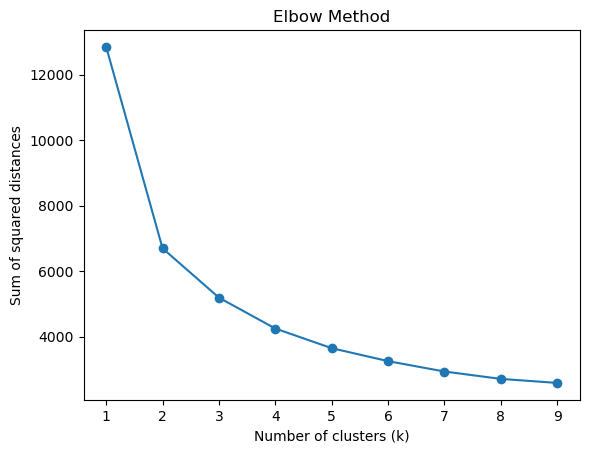

In [107]:
calculate_error(X)

From the above plot we can observe that the optimal value should be either 2 or 3. We will take the optimal value be k=2.

In [108]:
# Obtain centroids and using the kmeans function
centroids, labels = k_means(X, 2)

# Predict new clusters for the datapoints
distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
new_labels = np.argmin(distances, axis=0)


In [109]:
#Get cluster characteristics. Since we are interested in the original values,
#we use the non-log transformed, non-standardized dataframe

df5_clus2 = df5.assign(Cluster = new_labels)
print(df5_clus2.shape)
df5_clus2.head(2)

(4284, 4)


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,0


In [110]:
#Getting the statistics according to the clusters

df5_clus2.groupby(['Cluster']).agg({ 'Recency': 'mean',
'Frequency': 'mean',
'Monetary': ['mean', 'count'],
}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         140.0      25.0    427.0  2375
1          30.0     171.0   3515.0  1909

----------------------

Now we will plot the clusters accordingly with our features. The first plot would be a 3d plot considering all three features as our dimensions.

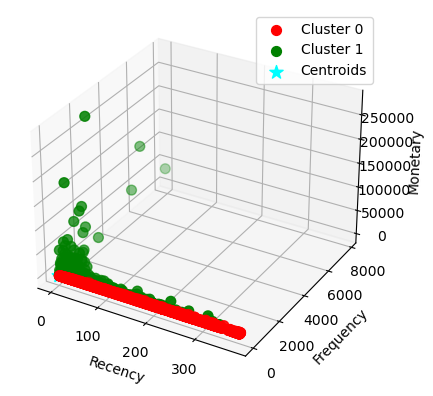

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for k in range(centroids.shape[0]):
    cluster_data = df5_clus2[df5_clus2['Cluster'] == k]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], s=50, c=colors[k], label=f'Cluster {k}')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, marker='*', c='cyan', label='Centroids')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.grid()
plt.show()

Now we would generate 2d plots for the features.

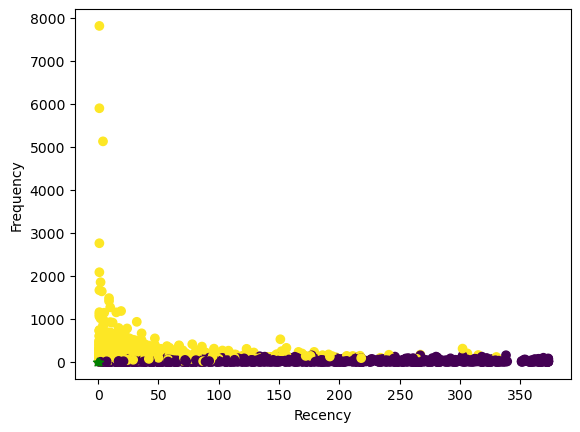

In [112]:
plt.scatter(df5_clus2['Recency'], df5_clus2['Frequency'], c=df5_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

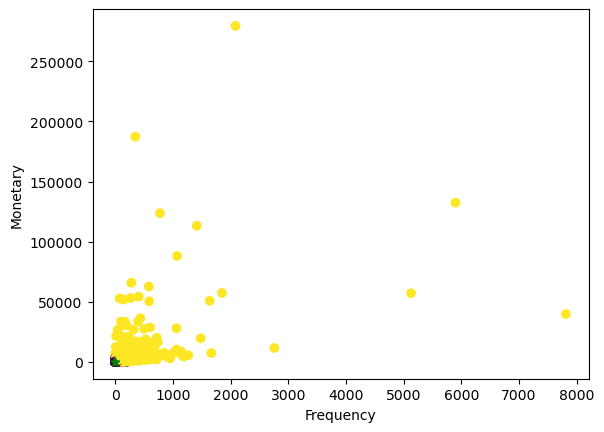

In [113]:
plt.scatter(df5_clus2['Frequency'], df5_clus2['Monetary'], c=df5_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

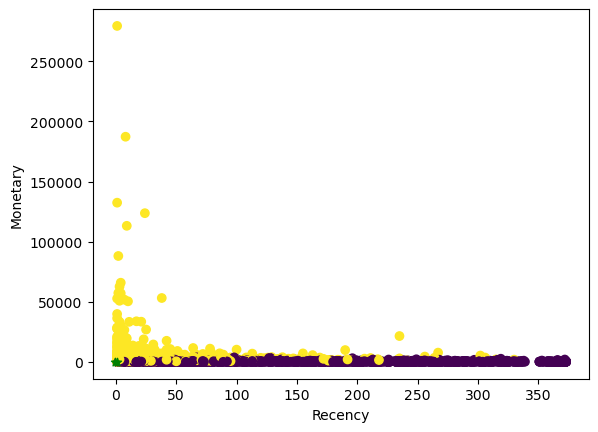

In [114]:
plt.scatter(df5_clus2['Recency'], df5_clus2['Monetary'], c=df5_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

We can observe in the above graphs that our unscaled and skew data does not provide clear clusters. So we would try plotting the visualization for the scaled and unskewed dataset.

In [115]:
df7_clus2 = df7.assign(Cluster = new_labels)
print(df7_clus2.shape)
df7_clus2.head(2)

(4284, 4)


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,-1.960795,1.188338,1.461907,1
12348.0,0.398415,-0.229121,0.761284,0


In [116]:
df7_clus2.groupby(['Cluster']).agg({ 'Recency': 'mean',
'Frequency': 'mean',
'Monetary': ['mean', 'count'],
}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           1.0      -1.0     -1.0  2375
1          -1.0       1.0      1.0  1909

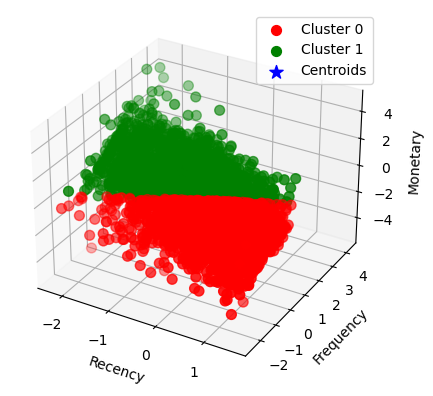

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for k in range(centroids.shape[0]):
    cluster_data = df7_clus2[df7_clus2['Cluster'] == k]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], s=50, c=colors[k], label=f'Cluster {k}')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, marker='*', c='blue', label='Centroids')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.grid()
plt.show()

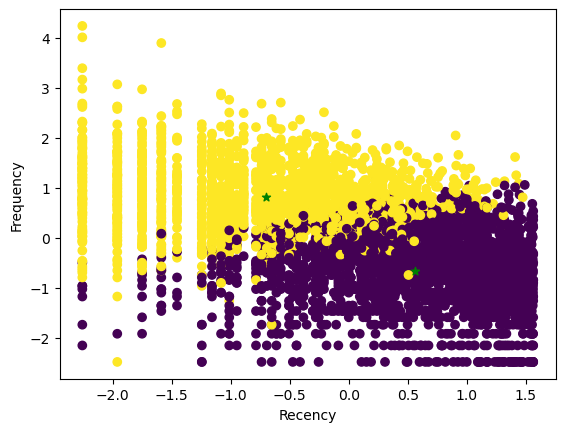

In [118]:
plt.scatter(df7_clus2['Recency'], df7_clus2['Frequency'], c=df7_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

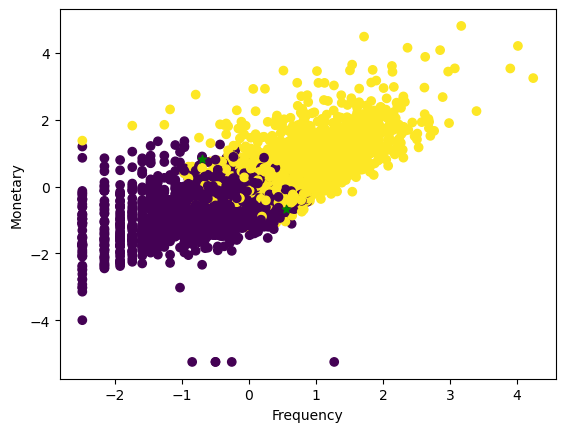

In [119]:
plt.scatter(df7_clus2['Frequency'], df7_clus2['Monetary'], c=df7_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

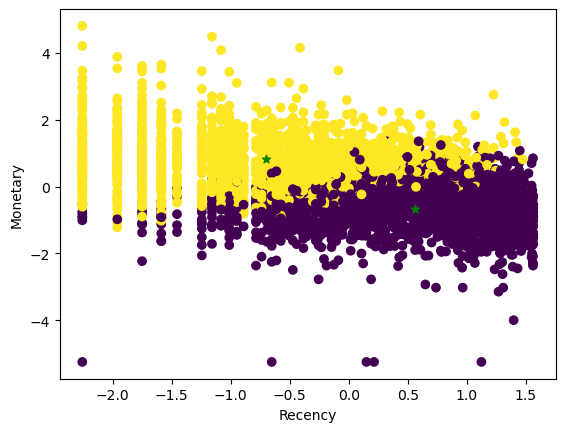

In [120]:
plt.scatter(df7_clus2['Recency'], df7_clus2['Monetary'], c=df7_clus2['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

We can observe the clusters from these visualizations.

------------------------------------

-----------------------------------------------------------end------------------------------------------------------------------------------------